In [1]:
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.preprocessing import Normalizer, OneHotEncoder
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# OneHotEncoder?

In [3]:
n_samples = 1000
n_features = 2
train_rate = 0.8
k = 2

In [4]:
X, y = make_classification(n_samples=n_samples, n_classes=k, n_features=n_features, n_informative=2, n_redundant=0, n_clusters_per_class=1)

In [5]:
X.shape

(1000, 2)

In [6]:
y.shape

(1000,)

In [7]:
y_one_hot = np.zeros((y.shape[0], k))

In [8]:
y_one_hot[np.arange(y.shape[0]), y]=1

In [9]:
y_one_hot.shape

(1000, 2)

In [10]:
y = y_one_hot

In [11]:
N = X.shape[0]

In [12]:
d = X.shape[1]

In [13]:
w = np.ones((k, d+1))

In [14]:
X = np.array(X)
print(X.shape)

(1000, 2)


In [15]:
y = np.array(y)
print(y.shape)

(1000, 2)


In [16]:
X = np.hstack((np.ones((N, 1)), X))

In [17]:
X.shape

(1000, 3)

In [18]:
w.shape

(2, 3)

In [19]:
def softmax(z):
    return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T

In [20]:
y_pred = np.dot(X, np.transpose(w))

In [21]:
y_pred_softmax = softmax(y_pred)

In [22]:
y_pred_softmax[0]

array([ 0.5,  0.5])

In [23]:
y_pred_softmax.shape

(1000, 2)

In [24]:
y.shape

(1000, 2)

In [25]:
# gradient = 1/N * np.dot(np.transpose(y_pred_softmax-y), X)
# w -= lr*gradient
# print(gradient.shape)
# print(w)

In [26]:
lr = 0.1
errors = []

In [27]:
for epoch in range(10000):
    y_pred = np.dot(X, np.transpose(w))
    y_pred_softmax = softmax(y_pred)
    error = abs(y_pred_softmax-y)
    errors.append(sum(sum(error)))
    gradient = 1.0/N * np.dot(np.transpose(y_pred_softmax-y), X)
    w -= lr*gradient
print(sum(sum(error)))

67.9577000446


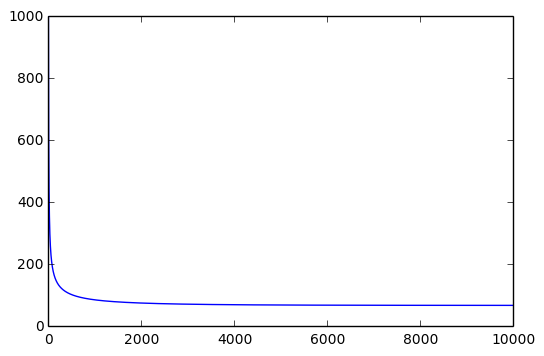

In [28]:
plt.plot(errors)